# Almog PIV project

Post analysis, see also the analysis*.ipynb

February 15
Run 1 


In [1]:
from pivpy import pivpy, io, graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)

/home/user/Documents/repos/pivpy/pivpy/io.py:19: UserWarning: lvreader is not installed
  warnings.warn("lvreader is not installed")


In [3]:
## Initialize data location

In [4]:
import pathlib
root_path = pathlib.Path('/media/user/ExtremePro/almog/feb15-')
analysis_path = root_path / 'Analysis'
image_path = root_path / 'RawData'

# run 1:
run_no = 1
first_file = 100
num_files = 100


list_files = sorted(analysis_path.rglob('feb15-000*.vec'))
netcdf_file = f'../data/feb15_run{run_no}.nc'
res_png = f'../results/feb15-run{run_no}.png'

In [5]:
# since we have some demo files 200, 202, we need to start with 210
ids = np.array([int(str(f).split('feb15-')[-1].split('.')[0]) for f in list_files])

# manually substitute the first and the last files
selection = np.nonzero([(ids >= first_file) & (ids<first_file+num_files)])

list_files = np.array(list_files)[selection[1]]

In [6]:
len(list_files), list_files[0], list_files[-1]

(100,
 PosixPath('/media/user/ExtremePro/almog/feb15-/Analysis/feb15-000100.T000.D000.P000.H000.L.vec'),
 PosixPath('/media/user/ExtremePro/almog/feb15-/Analysis/feb15-000199.T000.D000.P000.H000.L.vec'))

## Load PIV data

In [7]:
ds = xr.load_dataset(netcdf_file)

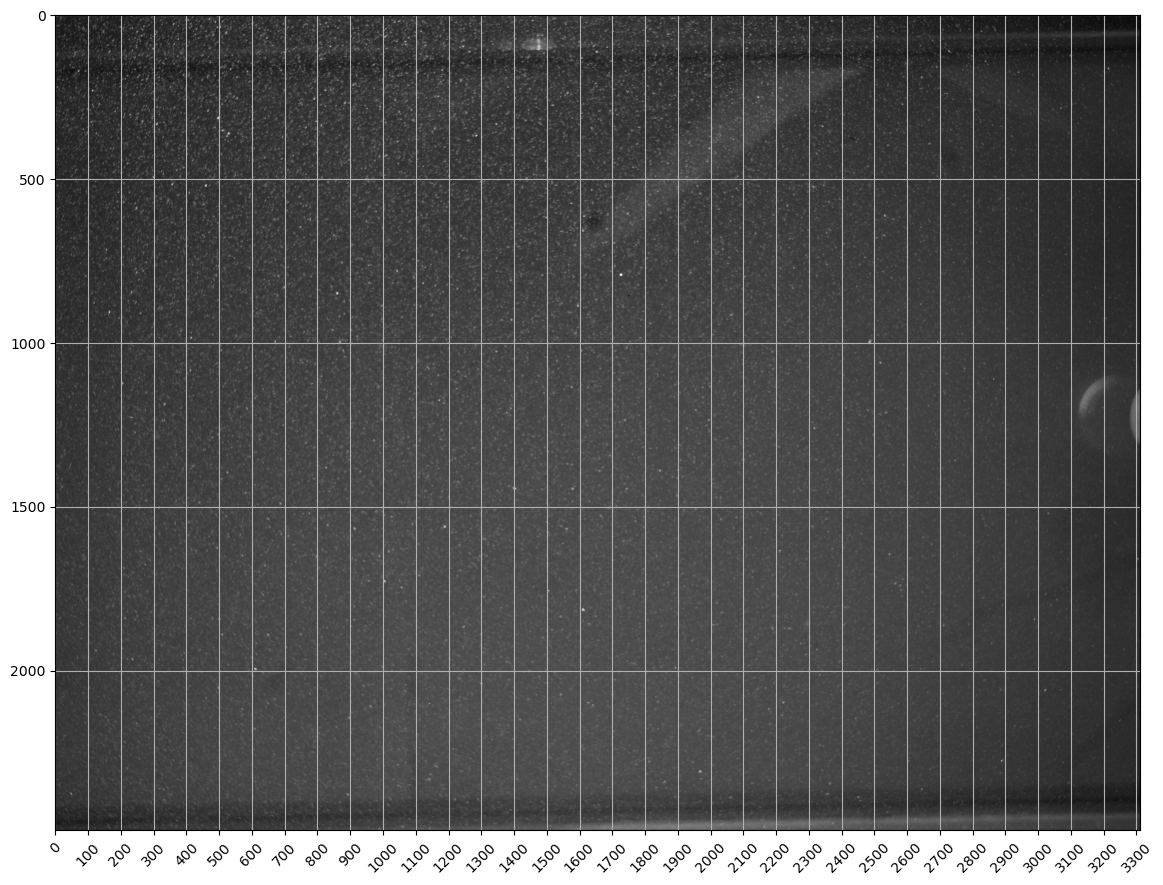

In [ ]:
# im = plt.imread('/media/user/ExtremePro/amiad/spacer_68_/RawData/test000120.T000.D000.P000.H000.LB.TIF')
im = plt.imread(image_path / 'feb15-000100.T000.D000.P000.H000.LA.TIF')

from skimage import exposure 
plt.figure(figsize=(14,14))
plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray')
plt.xticks(np.arange(0,im.shape[1],100),rotation=45)
plt.grid('on')


In [ ]:
# right point on 1 is 3240, 1387
# left point on 24 36, 1452
# open the scale image
dist = np.sqrt((3240-36)**2 + (1452-1387)**2)
dist

3204.6592642588384

In [ ]:
# we measured 
mm_diameter = 230 # mm
pix_diameter = 3204 # pix, see above
dt = 10000e-6 # 10,000 microseconds = 10 msec = 0.01 sec

# ds = ds.piv.set_scale(mm_diameter/pix_diameter)
# ds = ds.piv.set_delta_t(dt)
ds['u'] = ds['u']*mm_diameter/pix_diameter
ds['v'] = ds['v']*mm_diameter/pix_diameter
ds['u'] = ds.u / dt
ds['v'] = ds.v / dt

# # now size is in mm and velocity in m/s

ave = ds.piv.average

In [ ]:
# import napari
# viewer = napari.Viewer()
# viewer.add_image(im)
# manually measured 750 pixels which is the width 24 mm 

In [ ]:
# we measured the small diameter  17.8 mm
# and we see from the above photo 
# in /media/user/ExtremePro/amiad_20-Nov_/spacer_68_/RawData
# that it's from 850 to 2300 pix, i.e. 1450 pix

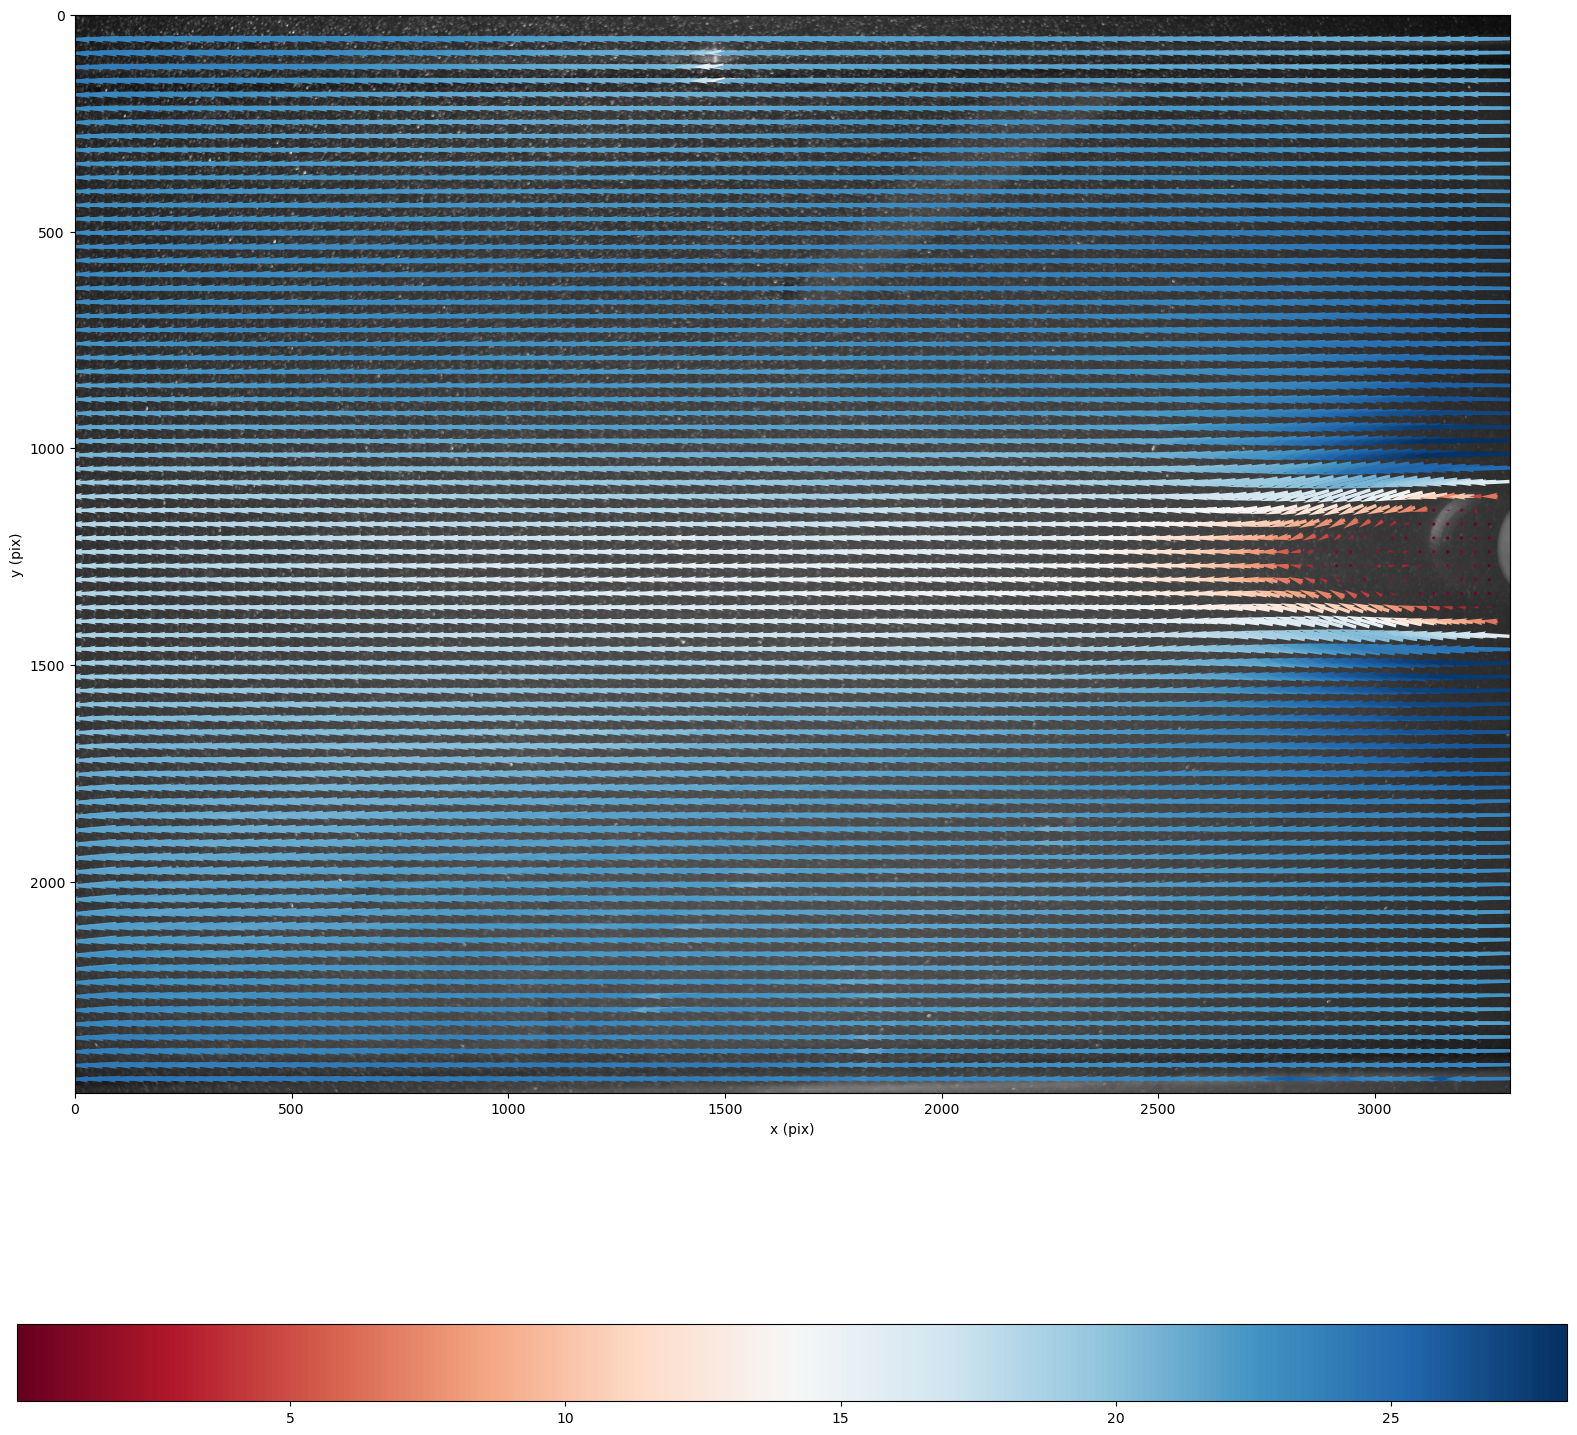

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(exposure.adjust_gamma(im,.3), cmap='gray',origin='upper')
tmp = ave.copy(deep=True)
tmp['y'] = tmp['y'][::-1]

tmp.piv.quiver(arrScale = 20,colorbar=True, colorbar_orient='horizontal', nthArr = 4)
# plt.gca().invert_yaxis()
plt.savefig('./results/feb15-run1.png',dpi=200)